In [75]:
import pandas as pd
import anndata as ad
import scanpy as sc

def plot_umap(adata, colorby, axis, normalize, palette='tab20', legend_loc=None, legend_fontsize=None):
    if normalize:
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        sc.pp.scale(adata)
        
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_pcs=40)

    sc.tl.umap(adata)

    sc.pl.umap(adata, color=colorby, palette=palette, ax=axis, show=False, legend_loc=legend_loc, size=95, legend_fontsize=legend_fontsize)

In [ ]:
# dataframe with the recombat corrected counts
recombatdf = pd.read_csv("/DATA/recombat_counts.csv", index_col=0, header=0)

In [ ]:
tissue = "Bronchoalveolar_lavage"
tissue_2 = tissue.replace("_", " ")

# read in the compressed raw tissue files, as well as the corrected csvs
metadata = pd.read_csv("/DATA/metadata.csv", ndex_col=0, header=0)
tissue_adata = sc.read_h5ad(f'/DATA/tissues/{tissue}_exp.h5ad')
tissue_result = pd.read_csv(f'/DATA/tissues_results/{tissue}_exp_corr.csv',
                            index_col=0, header=0, dtype="float64")

recombat_tissue = recombatdf[metadata["Tissue"] == f"{tissue_2}"]

tissue_adata.obs.batch = tissue_adata.obs.batch.cat.remove_unused_categories()
tissue_adata.obs.disease = tissue_adata.obs.disease.cat.remove_unused_categories()

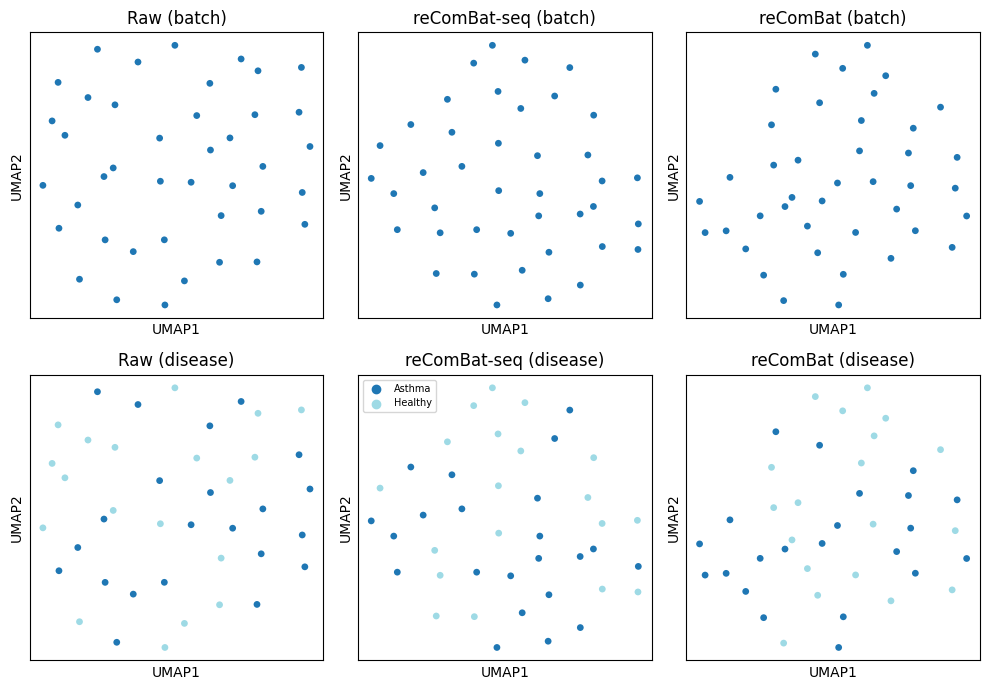

In [194]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3)

plot_umap(tissue_adata, colorby="batch", axis=axes[0,0], normalize=True)
plot_umap(tissue_adata, colorby="disease", axis=axes[1,0], normalize=False)
axes[0,0].set_title("Raw (batch)")
axes[1,0].set_title("Raw (disease)")

tissue_adata.X = tissue_result.T.values
plot_umap(tissue_adata, colorby="batch", axis=axes[0,1], normalize=True)
plot_umap(tissue_adata, colorby="disease", axis=axes[1,1], normalize=False, legend_loc="upper left", legend_fontsize=7)
axes[0,1].set_title("reComBat-seq (batch)")
axes[1,1].set_title("reComBat-seq (disease)")

tissue_adata.X = recombat_tissue.values
plot_umap(tissue_adata, colorby="batch", axis=axes[0,2], normalize=False)
plot_umap(tissue_adata, colorby="disease", axis=axes[1,2], normalize=False)
axes[0,2].set_title("reComBat (batch)")
axes[1,2].set_title("reComBat (disease)")

fig.set_figwidth(10)
fig.set_figheight(7)
fig.tight_layout()
fig.savefig(f"/Users/zhasmina/Downloads/python_proj/tissues_pics/{tissue}.png", dpi=300)

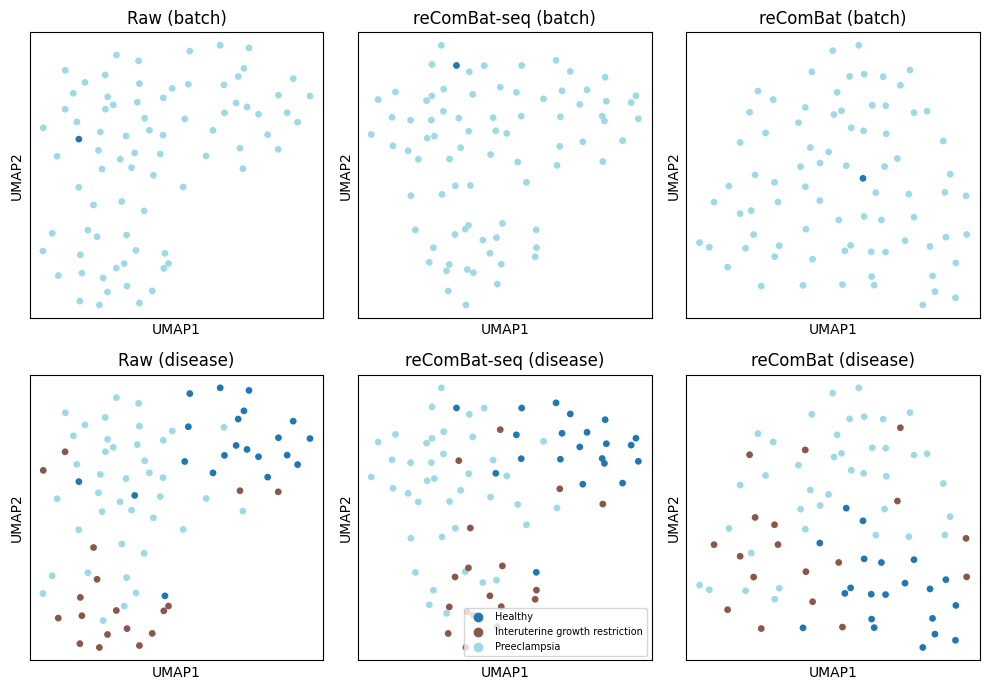

In [190]:
#axes[1,1].get_legend().remove()
axes[1, 1].legend(loc="lower right", fontsize=7)
fig

In [ ]:
fig.savefig(f"/DATA/tissues_pics/{tissue}.png", dpi=300)